In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from scipy.linalg import solve
from math import pi,sqrt,exp

In [2]:
L=1.
nx=21
alpha=0.00122
dx=L/(nx-1)
Ti=numpy.zeros(nx)
Ti[0]=100.
sigma=.5
dt=sigma*dx*dx/alpha
nt=10

In [3]:
def generateMatrix(N,sigma):
    d=2*numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    d[-1,-1]=1+2./sigma
    ud=numpy.diag(numpy.ones(N-3)*-1,1)
    ld=numpy.diag(numpy.ones(N-3)*-1,-1)
    A=d+ud+ld
    return A

In [4]:
def generateRHS(T,sigma):
    b=T[1:-1]*2*(1./sigma-1)+T[:-2]+T[2:]
    b[0]+=T[0]
    return b

In [5]:
def CrankNicolson(T,A,nt,sigma):
    for t in range(nt):
        Tn=T.copy()
        b=generateRHS(Tn,sigma)
        T_interior=solve(A,b)
        T[1:-1]=T_interior
        T[-1]=T[-2]
    return T

In [6]:
A=generateMatrix(nx,sigma)
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

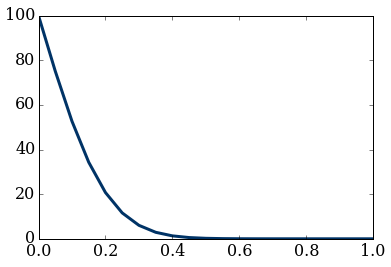

In [7]:
T=CrankNicolson(Ti.copy(),A,nt,sigma)
x=numpy.linspace(0,L,nx)
pyplot.plot(x,T,color='#003366',ls='-',lw=3);

In [8]:
def T_analytical(x,t,N,alpha,L):
    T=100.
    for n in range(1,N+1):
        k=(2*n-1)*pi/(2*L)
        summation=400./((2*n-1)*pi)*numpy.sin(k*x)*exp(-alpha*k*k*t)
        T-=summation
    return T

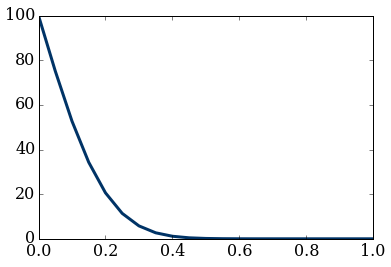

In [9]:
T_exact=T_analytical(x,dt*nt,100,alpha,L)
pyplot.plot(x,T_exact,color='#003366',ls='-',lw=3);

In [10]:
T1=T_analytical(x,.2,100,alpha,L)
T2=T_analytical(x,.2,200,alpha,L)
sqrt(sum((T1-T2)**2)/sum(T2**2))

6.927917118260092e-13

In [11]:
def L2_error(T,T_exact):
    e=sqrt(numpy.sum((T-T_exact)**2)/sum(T_exact)**2)
    return e

In [12]:
def generateMatrix_btcs(N,sigma):
    d=numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    d[-1,-1]=1+1./sigma
    ud=numpy.diag(numpy.ones(N-3)*-1,1)
    ld=numpy.diag(numpy.ones(N-3)*-1,-1)
    A=d+ud+ld
    return A
def generateRHS_btcs(T,sigma):
    b=numpy.zeros_like(T)
    b=T[1:-1]*1./sigma
    b[0]+=T[0]
    return b
def implicit_btcs(T,A,nt,sigma):
    for t in range(nt):
        Tn=T.copy()
        b=generateRHS_btcs(Tn,sigma)
        T_interior=solve(A,b)
        T[1:-1]=T_interior
        T[-1]=T[-2]
    return T

In [13]:
nx=1001
dx=L/(nx-1)
dt_values=numpy.asarray([1.0,.5,.25,.125])
error=numpy.zeros(len(dt_values))
error_ftcs=error.copy()
t_final=10
t_initial=1
x=numpy.linspace(0,L,nx)
Ti=T_analytical(x,t_initial,100,alpha,L)
T_exact=T_analytical(x,t_final,100,alpha,L)
for i,dt in enumerate(dt_values):
    sigma=alpha*dt/dx**2
    nt=int((t_final-t_initial)/dt)
    A=generateMatrix(nx,sigma)
    A_btcs=generateMatrix_btcs(nx,sigma)
    T=CrankNicolson(Ti.copy(),A,nt,sigma)
    error[i]=L2_error(T,T_exact)
    T=implicit_btcs(Ti.copy(),A_btcs,nt,sigma)
    error_ftcs[i]=L2_error(T,T_exact)

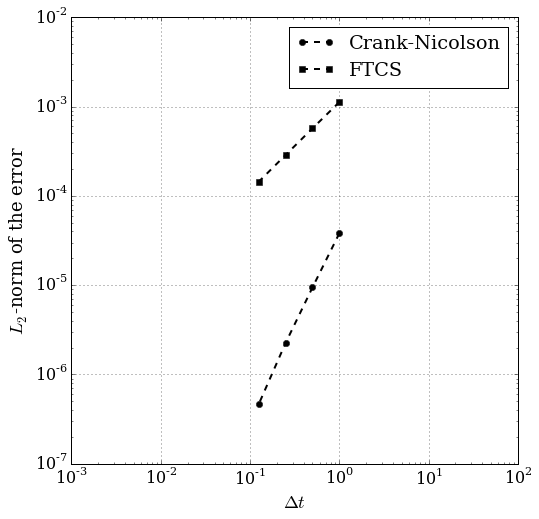

In [14]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.loglog(dt_values, error_ftcs, color='k', ls='--', lw=2, marker='s')
pyplot.legend(['Crank-Nicolson', 'FTCS']);

In [15]:
error

array([  3.81125927e-05,   9.41813943e-06,   2.25089054e-06,
         4.63970974e-07])

In [16]:
nx_values=numpy.asarray([11,21,41,81,161])
dt=.1
error=numpy.zeros(len(nx_values))
t_final=20.
x=numpy.linspace(0,L,nx)
for i,nx in enumerate(nx_values):
    dx=L/(nx-1)
    x=numpy.linspace(0,L,nx)
    sigma=alpha*dt/dx**2
    nt=int(t_final/dt)
    A=generateMatrix(nx,sigma)
    Ti=numpy.zeros(nx)
    Ti[0]=100.
    T=CrankNicolson(Ti.copy(),A,nt,sigma)
    T_exact=T_analytical(x,t_final,100,alpha,L)
    error[i]=L2_error(T,T_exact)

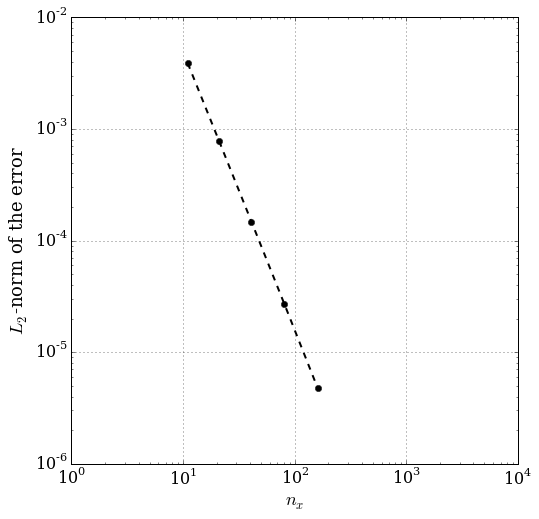

In [17]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')

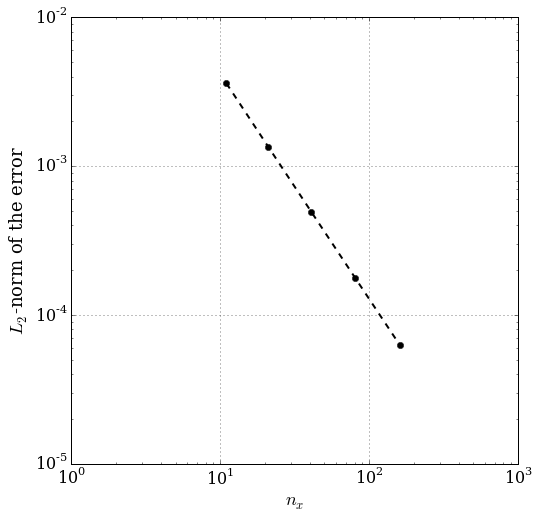

In [18]:
nx_values=numpy.asarray([11,21,41,81,161])
dt=.1
error=numpy.zeros(len(nx_values))
t_final=1000.
x=numpy.linspace(0,L,nx)
for i,nx in enumerate(nx_values):
    dx=L/(nx-1)
    x=numpy.linspace(0,L,nx)
    sigma=alpha*dt/dx**2
    nt=int(t_final/dt)
    A=generateMatrix(nx,sigma)
    Ti=numpy.zeros(nx)
    Ti[0]=100.
    T=CrankNicolson(Ti.copy(),A,nt,sigma)
    T_exact=T_analytical(x,t_final,100,alpha,L)
    error[i]=L2_error(T,T_exact)
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.xlim(1,1000)
pyplot.ylim(1e-5,1e-2)
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')

In [19]:
error

array([  3.59569224e-03,   1.34923182e-03,   4.90905474e-04,
         1.76021088e-04,   6.26681531e-05])